In [1]:
#import Libraries

import pandas as pd
import numpy as np


In [2]:
#Read the data
data=pd.read_excel("dataset.xlsx")

In [3]:
#check the data top and bottom
data.head()
data.tail()

,Total WBC count,Neutrophils,Lymphocytes,Eosinophils,Monocytes,Basophils,Haemoglobin,Pcv,Red_Blood_Cell,Mcv,Mch,Mchc,platelet_count,Aspartate_aminotransferease,Alamine aminotransferease,Result
0,10390,50,28,3,5,1,14,42,4,86,29,31,385300,19,28,1
1,6000,55,32,4,5,1,15,39,5,88,29,33,353800,22,17,1
2,8000,48,29,6,5,1,13,44,4,89,32,32,200000,25,16,1
3,15000,72,28,8,9,1,18,48,6,99,36,36,400000,32,48,0
4,12000,70,38,7,6,1,19,44,5,102,35,38,410000,31,47,0


In [4]:
#select the x(independence) and y(dependence) data
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
# data size
x.shape,y.shape

((209, 15), (209,))

In [6]:
#split the train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

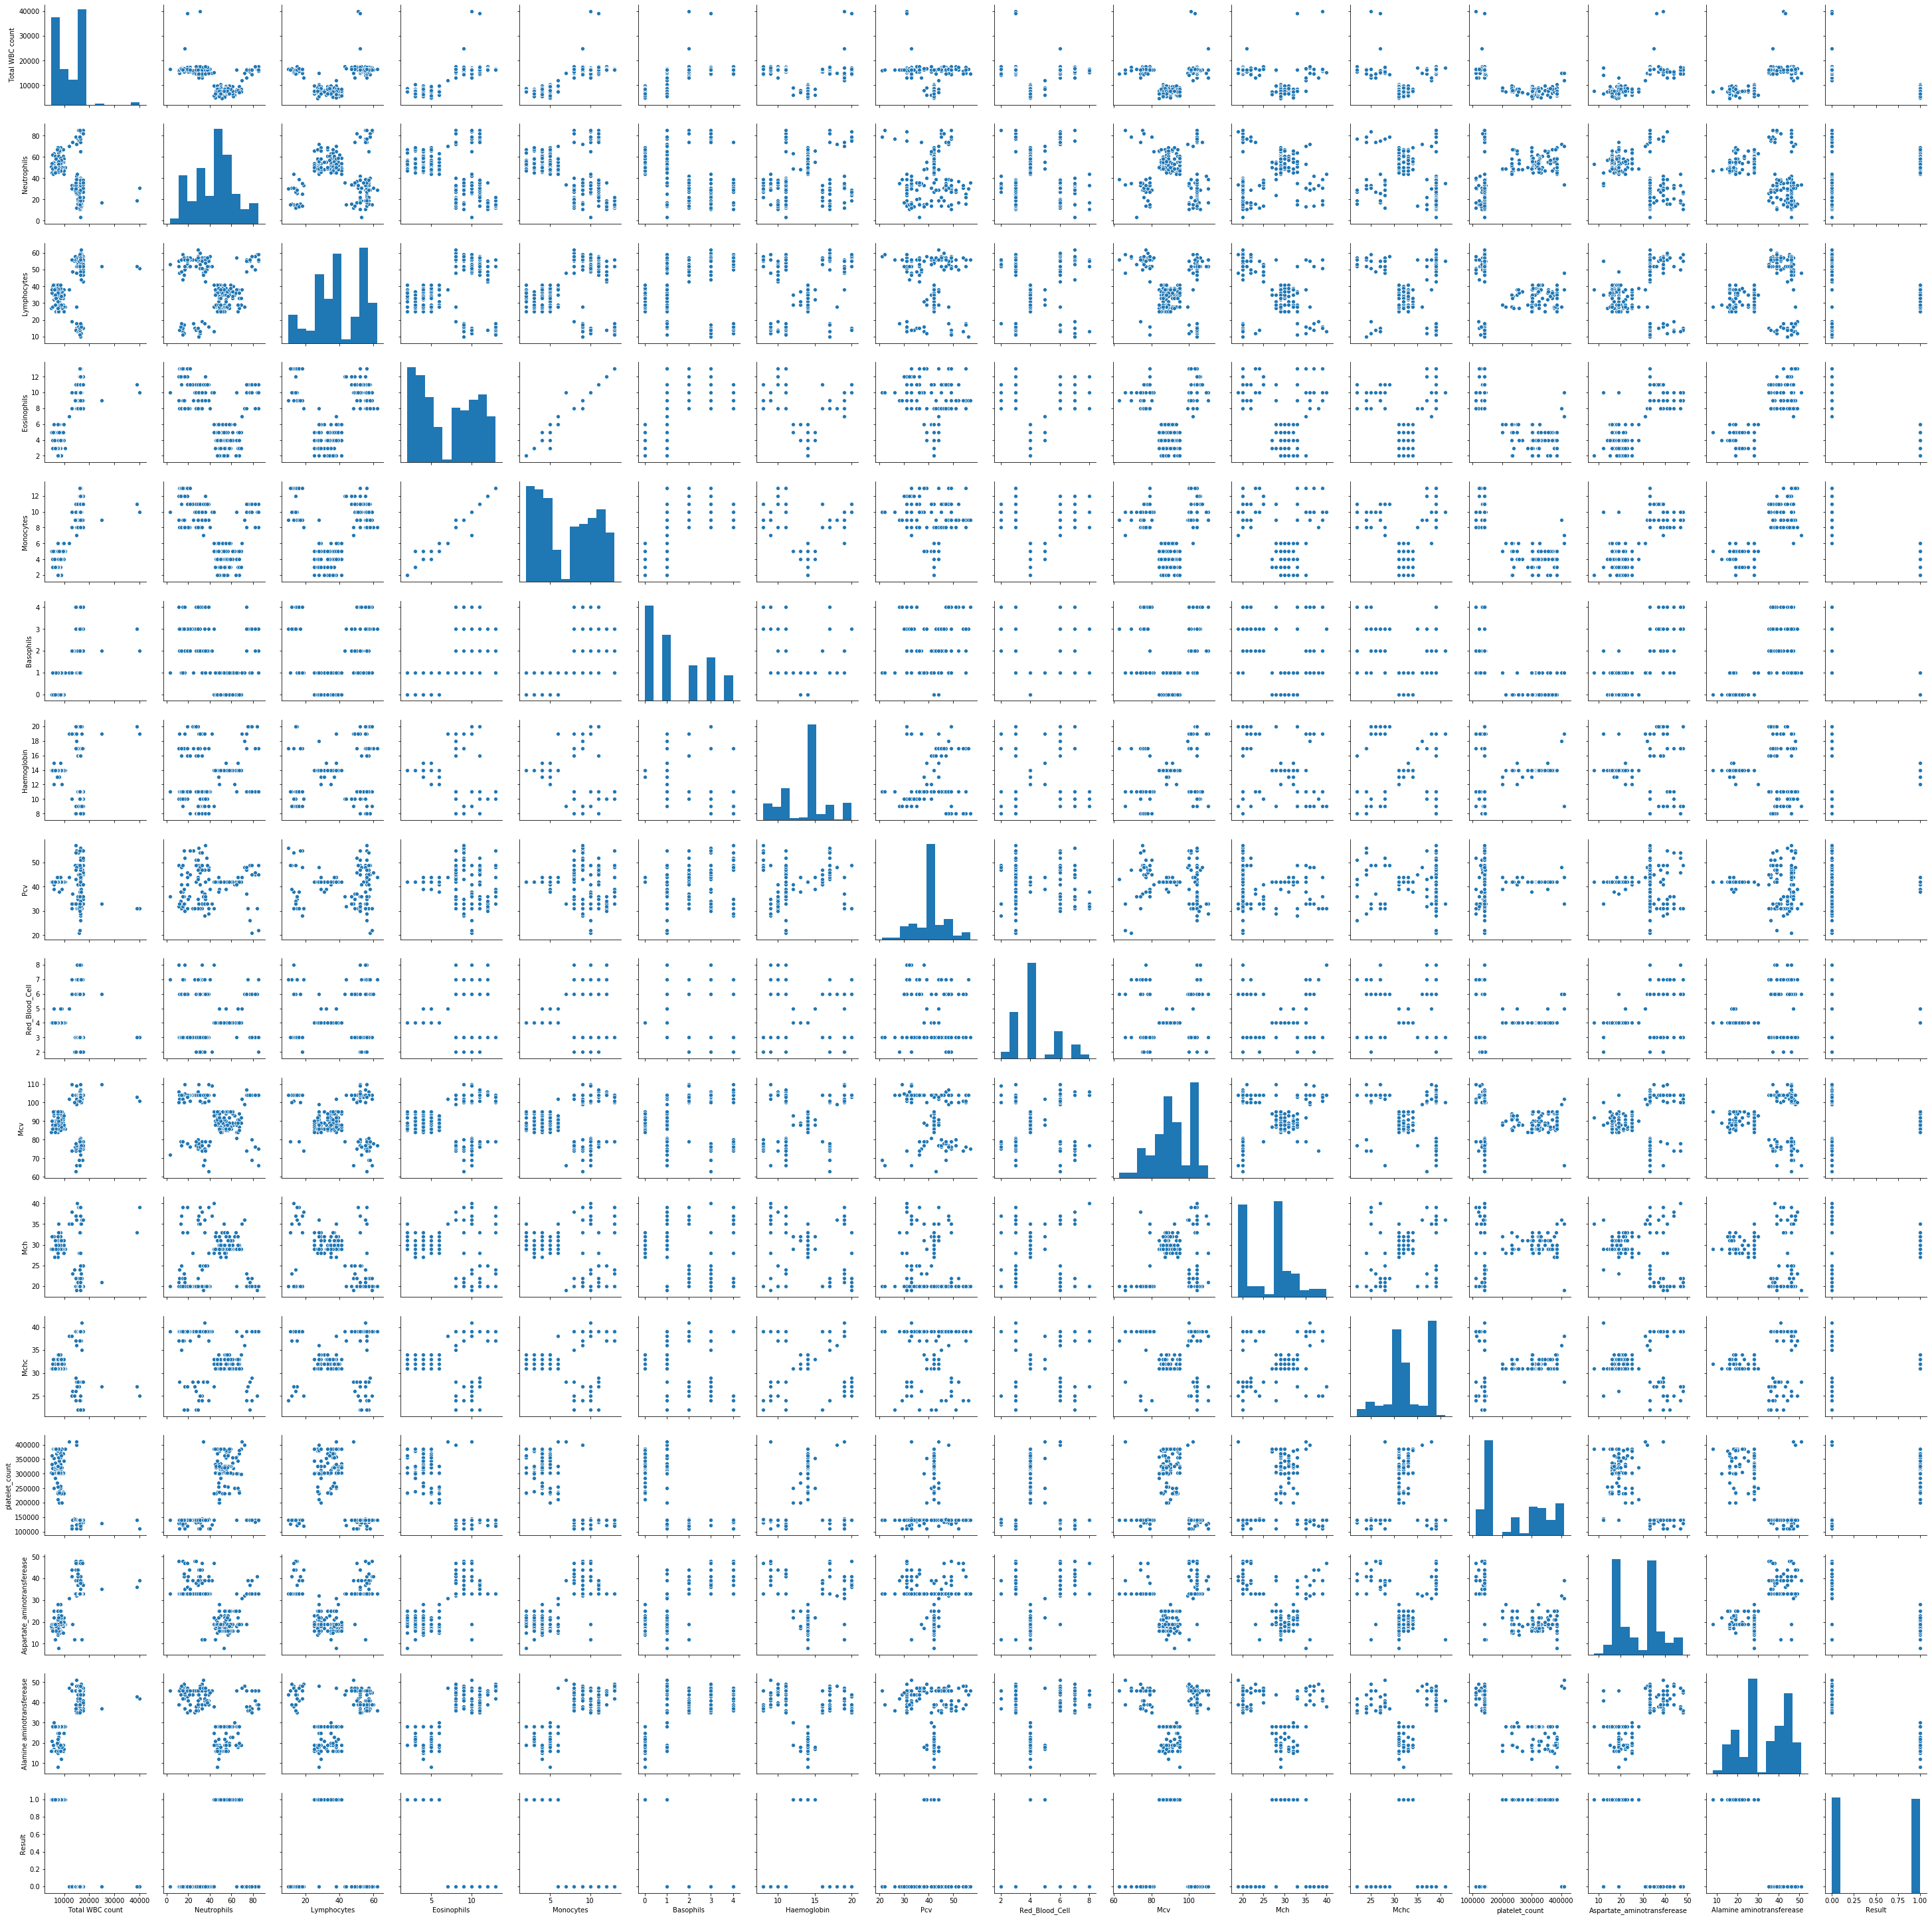

In [9]:
#visualise the data how coorelated to each other its help to select the classifier

import seaborn as sns
sns.pairplot(data)

In [10]:
#import SVM clasifier

from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0,gamma="auto")
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [11]:
#predict the test data
y_pred=classifier.predict(x_test)

In [15]:
#accuracy of the model
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)

In [16]:
print(accuracy)

0.9523809523809523


In [17]:
#check the distribution of the data
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[34,  3],
       [ 0, 26]], dtype=int64)

In [19]:
#check the classification report,ensure the data is not unbalancing
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.90      1.00      0.95        26

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.96      0.95      0.95        63



In [21]:
#Hyper parameter tuning
#applying the Grid search to find the best model and the best parameter

from sklearn.model_selection import GridSearchCV
parameters={"kernel":("linear","poly","rbf","sigmoid"),
           "C":[2,5,8,10,15,20],
           "gamma":("auto","scale"),
           "degree":[3,8],
           "coef0":[0.001,10,0.5]}

svmodel=SVC()

gridsearch=GridSearchCV(svmodel,parameters,cv=5)
gridsearch.fit(x_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [2, 5, 8, 10, 15, 20], 'coef0': [0.001, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
#best_score_,best_params_
gridsearch.best_params_,gridsearch.best_score_

({'C': 2, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'},
 1.0)

In [25]:
#train the model with hyper tuning parameters
classifier=SVC(kernel="linear",C=2,gamma="auto",degree= 3,coef0= 0.001)
classifier.fit(x_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.001,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
#predict the test data
y_pred=classifier.predict(x_test)

In [27]:
#accuracy of the model
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)

In [28]:
print(accuracy)

0.9523809523809523


In [29]:
#for better accuracy scaling the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [31]:
classifier=SVC(kernel="linear",C=2,gamma="auto",degree= 3,coef0= 0.001)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9841269841269841


In [33]:
#pickle to store the model
import pickle

pickle.dump(classifier,open("detectormodel.pkl","wb"))


In [34]:
#load model
load_model=pickle.load(open("detectormodel.pkl","rb"))
result=load_model.score(X_test,y_test)

In [35]:
print(result)

0.9841269841269841


In [42]:
#check the new data with model
x_new=np.array([[10390,50,28,3,5,1,14,42,4,86,29,31,385300,19,28]])

In [43]:
Y_pred=classifier.predict(x_new)

In [44]:
print(Y_pred)

[1]
